In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr

# Load dataset
df = pd.read_csv('credit_data.csv')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, skew, kurtosis, normaltest
import numpy as np

# Load dataset
df = pd.read_csv('credit_data.csv')

In [3]:
cat_cols = df.select_dtypes("O")
num_cols = [col for col in df.columns if col not in cat_cols and col != "default"]

# ========================
# Univariate Analysis
# ========================

Analysis for duration_in_month:
  Skewness: 1.09
  Kurtosis: 0.91


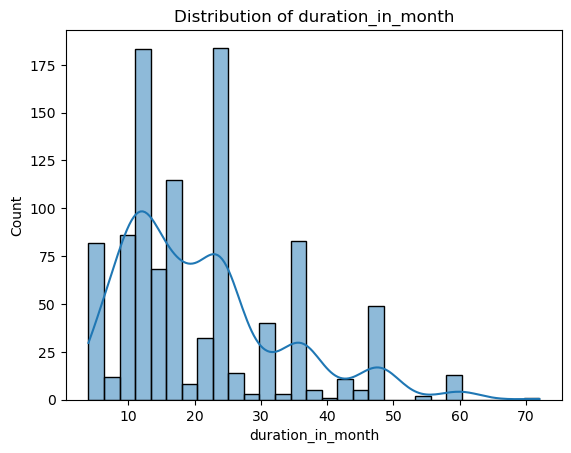

Normality Test for duration_in_month: stat=156.05, p-value=0.000
  duration_in_month is NOT normally distributed.

Analysis for credit_amount:
  Skewness: 1.95
  Kurtosis: 4.27


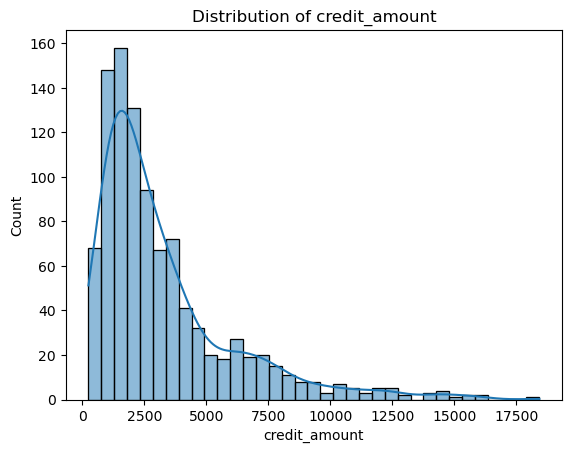

Normality Test for credit_amount: stat=396.04, p-value=0.000
  credit_amount is NOT normally distributed.

Analysis for installment_as_income_perc:
  Skewness: -0.53
  Kurtosis: -1.21


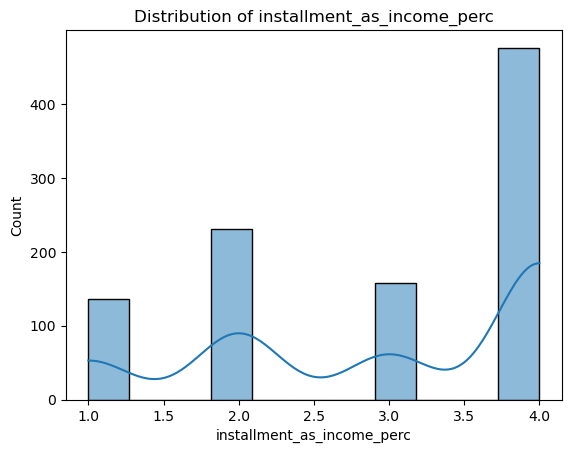

Normality Test for installment_as_income_perc: stat=842.43, p-value=0.000
  installment_as_income_perc is NOT normally distributed.

Analysis for present_res_since:
  Skewness: -0.27
  Kurtosis: -1.38


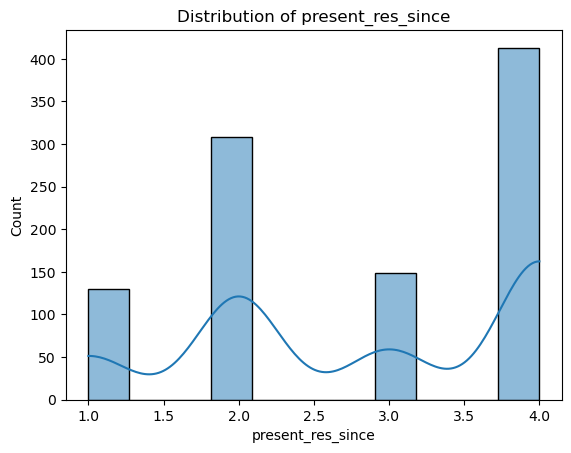

Normality Test for present_res_since: stat=22019.26, p-value=0.000
  present_res_since is NOT normally distributed.

Analysis for age:
  Skewness: 1.02
  Kurtosis: 0.59


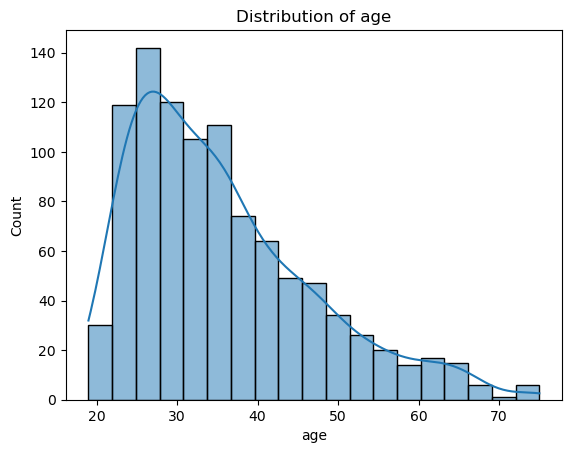

Normality Test for age: stat=133.89, p-value=0.000
  age is NOT normally distributed.

Analysis for credits_this_bank:
  Skewness: 1.27
  Kurtosis: 1.59


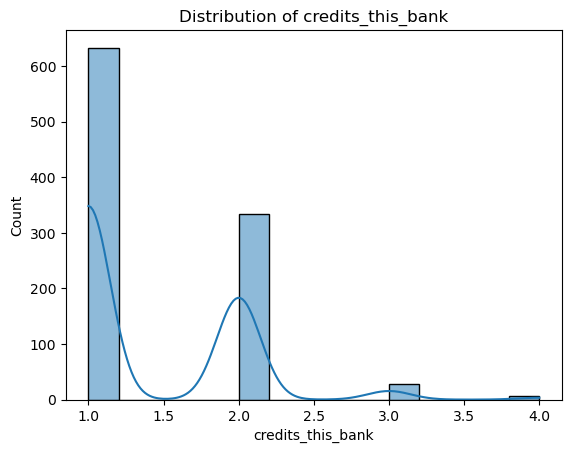

Normality Test for credits_this_bank: stat=208.70, p-value=0.000
  credits_this_bank is NOT normally distributed.

Analysis for people_under_maintenance:
  Skewness: 1.91
  Kurtosis: 1.64


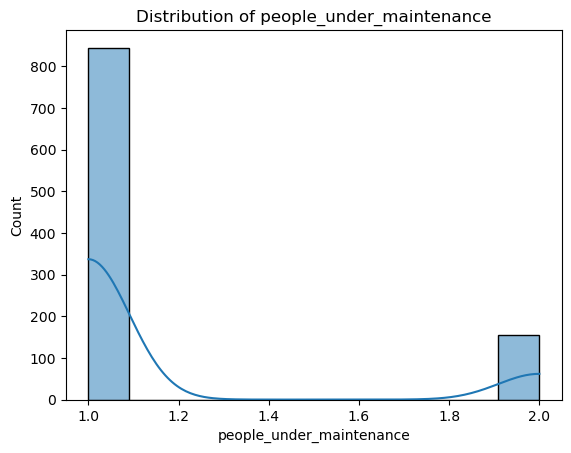

Normality Test for people_under_maintenance: stat=325.07, p-value=0.000
  people_under_maintenance is NOT normally distributed.



In [4]:
# 1. Numerical Variables
# Skewness and Kurtosis
for col in num_cols:
    print(f"Analysis for {col}:")
    print(f"  Skewness: {skew(df[col].dropna()):.2f}")
    print(f"  Kurtosis: {kurtosis(df[col].dropna()):.2f}")

# Distribution Plot

    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Normality Test (D’Agostino and Pearson’s test)

    stat, p = normaltest(df[col].dropna())
    print(f"Normality Test for {col}: stat={stat:.2f}, p-value={p:.3f}")
    if p < 0.05:
        print(f"  {col} is NOT normally distributed.\n")
    else:
        print(f"  {col} is normally distributed.\n")



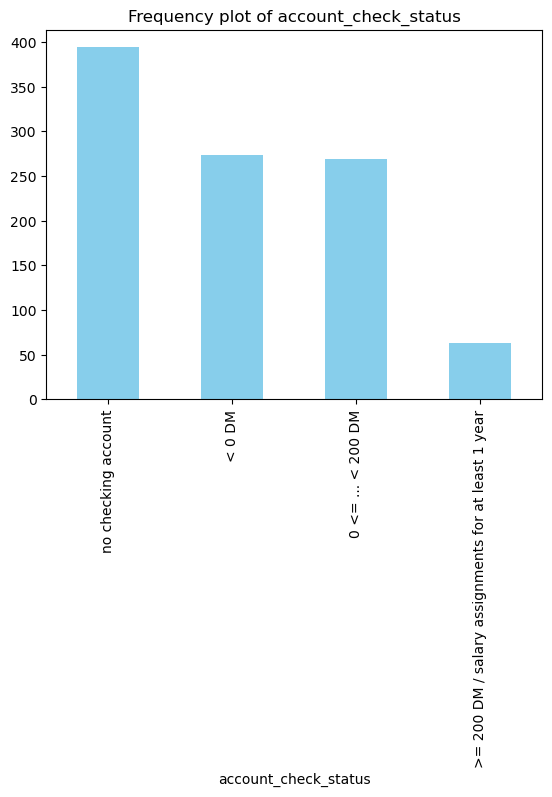

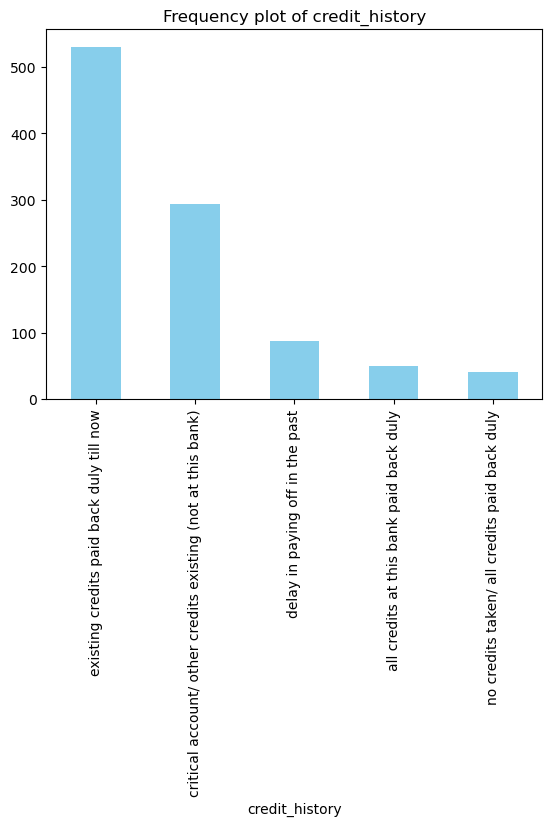

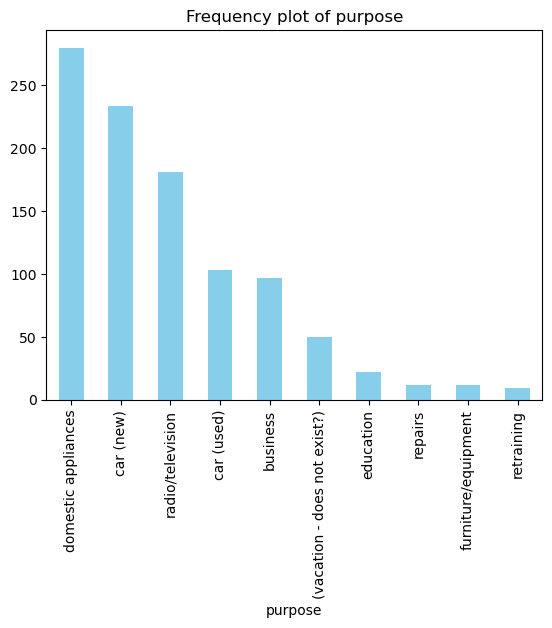

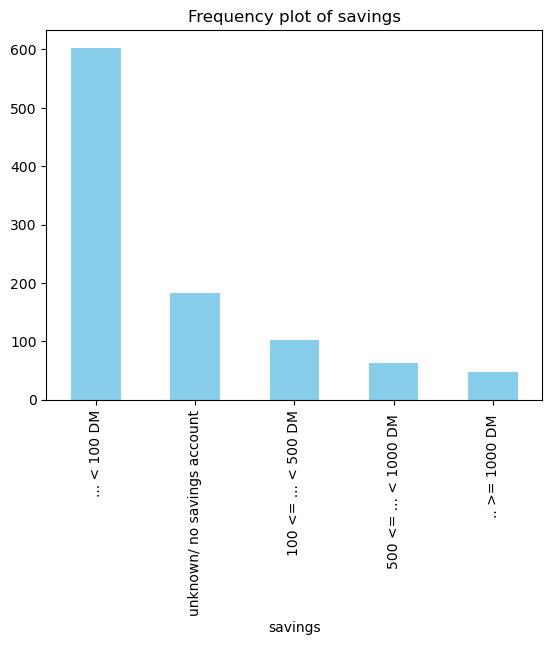

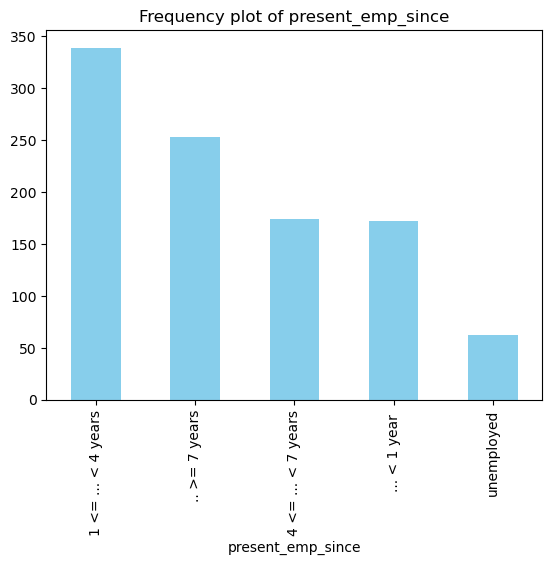

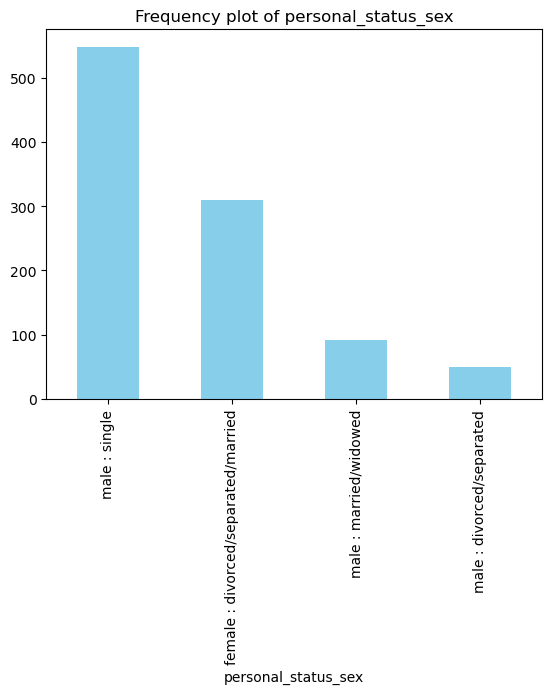

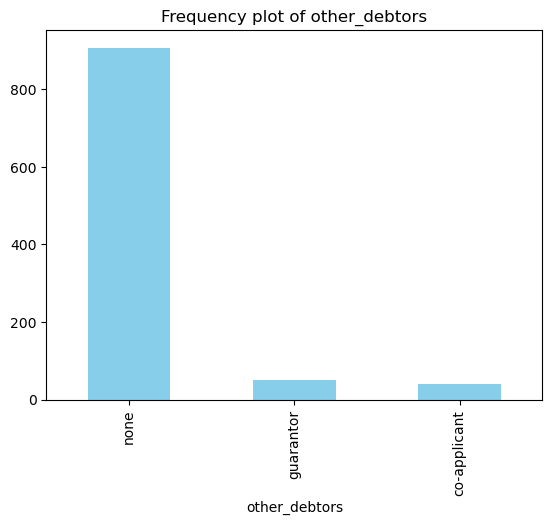

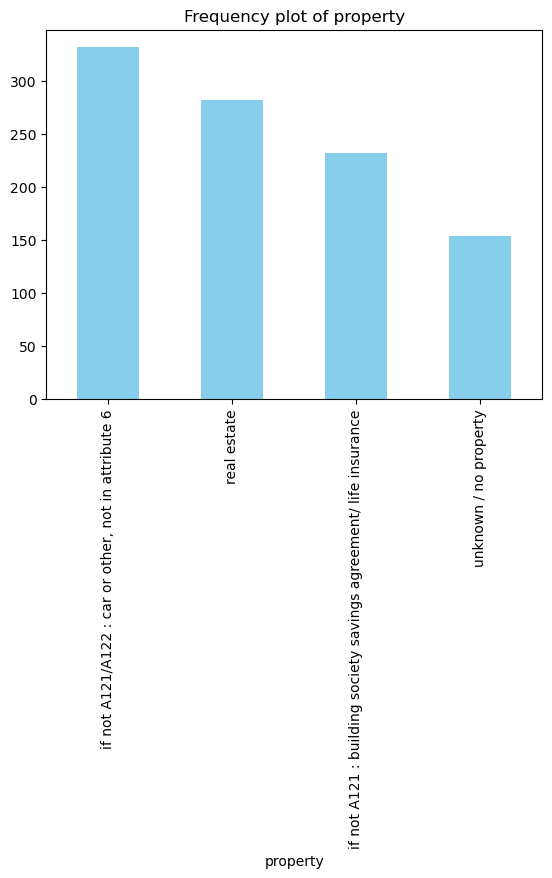

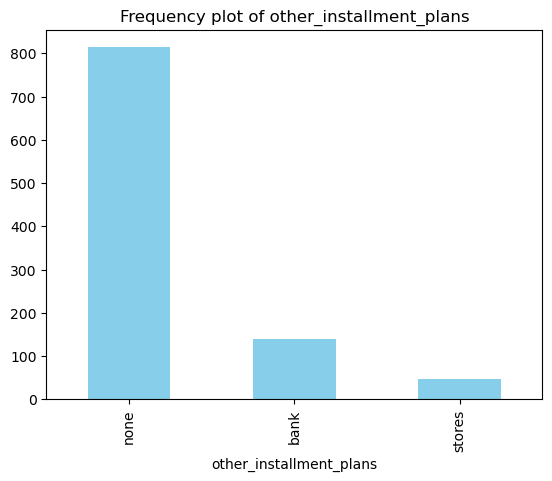

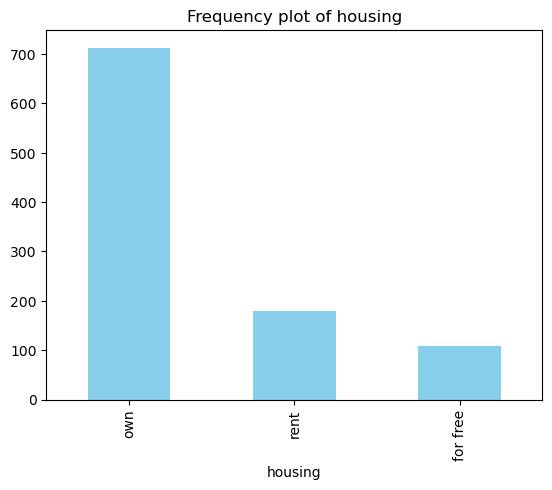

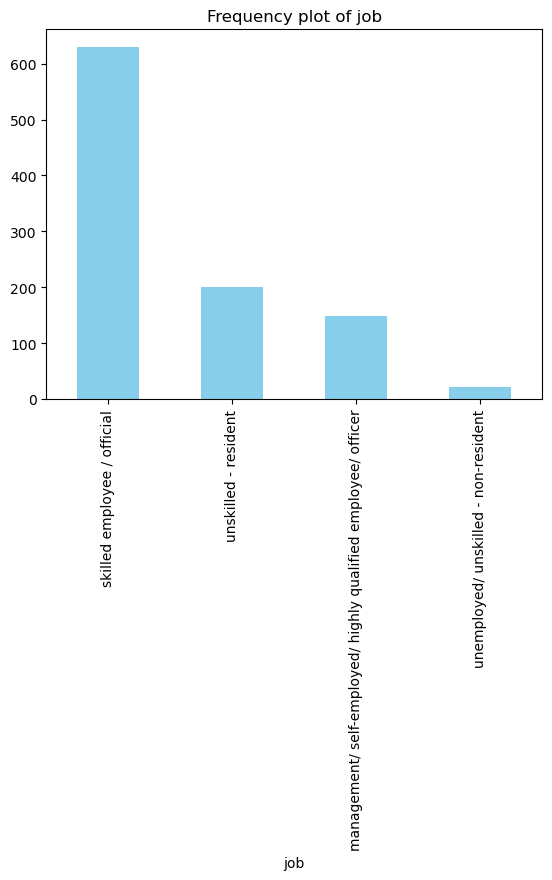

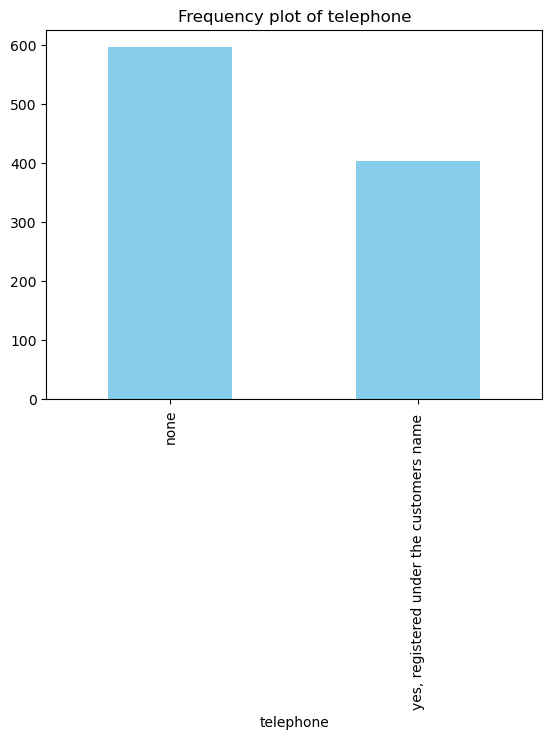

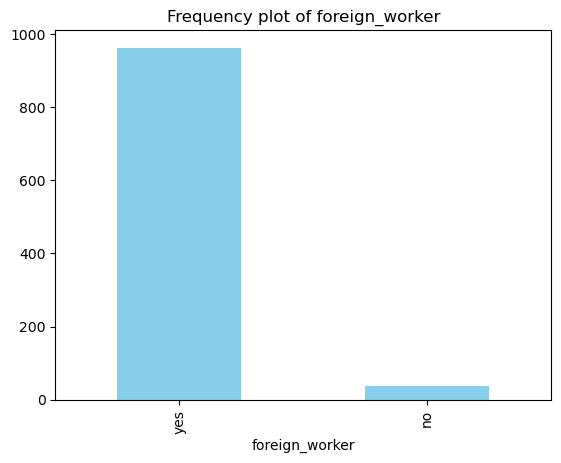

In [8]:
# 2. Categorical Variables
# Frequency Plot
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Frequency plot of {}'.format(col))
    plt.show()

# ========================
# Bivariate Analysis
# ========================

In [ ]:
# 1. Categorical-Categorical
# Chi-Square Test: Loan Type vs Default Status
with open("chi2_test_results.txt", "w") as f:
    for cat_col1 in cat_cols:
        for cat_col2 in cat_cols:
            if cat_col1 != cat_col2:
                contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                # print(f"Chi-Square Test for Loan Type and Default Status:")
                # print(f"  Chi2: {chi2:.2f}, p-value: {p:.3f}")
                if p < 0.05:
                    f.write("  Significant relationship between {} and {}.\n".format(cat_col1,cat_col2))
                else:
                    f.write("  No significant relationship between {} and {}.\n".format(cat_col1,cat_col2))


  Chi2: 60.33, p-value: 0.000
  Chi2: 66.80, p-value: 0.000
  Chi2: 92.47, p-value: 0.000
  Chi2: 27.26, p-value: 0.007
  Chi2: 13.54, p-value: 0.140
  Chi2: 23.56, p-value: 0.001
  Chi2: 17.22, p-value: 0.045
  Chi2: 4.28, p-value: 0.639
  Chi2: 19.47, p-value: 0.003
  Chi2: 16.96, p-value: 0.049
  Chi2: 6.55, p-value: 0.088
  Chi2: 6.40, p-value: 0.094
  Chi2: 60.33, p-value: 0.000
  Chi2: 111.70, p-value: 0.000
  Chi2: 20.45, p-value: 0.200
  Chi2: 40.57, p-value: 0.001
  Chi2: 25.62, p-value: 0.012
  Chi2: 15.31, p-value: 0.053
  Chi2: 19.11, p-value: 0.086
  Chi2: 92.77, p-value: 0.000
  Chi2: 18.92, p-value: 0.015
  Chi2: 12.62, p-value: 0.397
  Chi2: 5.11, p-value: 0.276
  Chi2: 4.91, p-value: 0.296
  Chi2: 66.80, p-value: 0.000
  Chi2: 111.70, p-value: 0.000
  Chi2: 51.82, p-value: 0.043
  Chi2: 59.28, p-value: 0.009
  Chi2: 68.45, p-value: 0.000
  Chi2: 54.62, p-value: 0.000
  Chi2: 127.08, p-value: 0.000
  Chi2: 40.91, p-value: 0.002
  Chi2: 88.34, p-value: 0.000
  Chi2: 123.

In [18]:
# 2. Numerical-Categorical
# T-Test: Annual Income vs Default Status (Binary)
with open("T-statistic.txt", "w") as f:
    for col in num_cols:
        default_group = df[df['default'] == 1][col]
        non_default_group = df[df['default'] == 0][col]

        t_stat, p = ttest_ind(default_group, non_default_group, equal_var=False)
        f.write("T-Test for {} by Default:".format(col))
        f.write(f"  T-statistic: {t_stat:.2f}, p-value: {p:.3f}")
        if p < 0.05:
            f.write("  Significant difference in {} between Default and Non-default groups.\n".format(col))
        else:
            f.write("  No significant difference in {} between Default and Non-default groups.\n".format(col))

# ANOVA: Loan Amount vs Loan Type (Categorical)
with open("ANOVA,.txt", "w") as f:
    for cat_col in cat_cols:
        for num_col in num_cols:
            loan_types = [df[df[cat_col] == lt][num_col] for lt in df[cat_col].unique()]
            anova_stat, p = f_oneway(*loan_types)
            f.write("ANOVA for {} by {}:".format(num_col, cat_col))
            f.write(f"  F-statistic: {anova_stat:.2f}, p-value: {p:.3f}")
            if p < 0.05:
                f.write("  Significant difference in {} between different {}.\n".format(num_col, cat_col))
            else:
                f.write("  No significant difference in {} between different {} .\n".format(num_col, cat_col))


Correlation between duration_in_month and credit_amount: 0.62


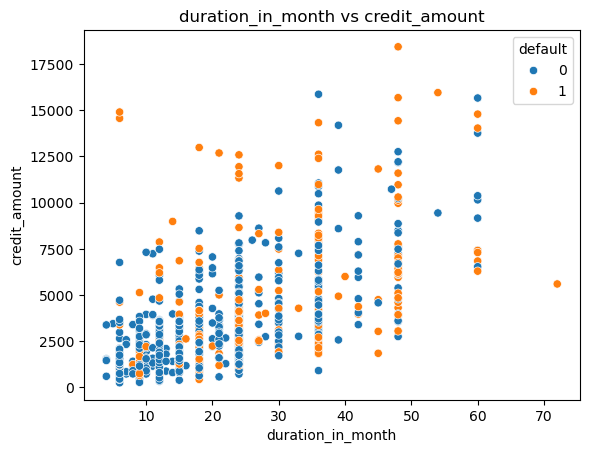

Correlation between credit_amount and duration_in_month: 0.62


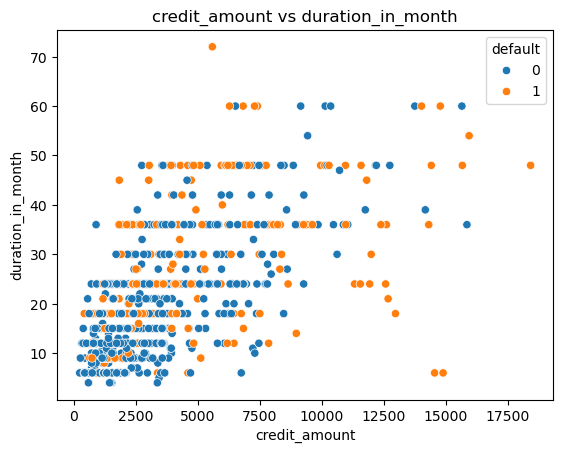

In [22]:
# 3. Numerical-Numerical
# Correlation Analysis: 
for num_col1 in num_cols:
    for num_col2 in num_cols:
        if num_col1 != num_col2:
            corr = df[num_col1].corr(df[num_col2])
            if np.abs(corr) >= 0.3:
                print(f"Correlation between {num_col1} and {num_col2}: {corr:.2f}")

                # Scatter Plot
                sns.scatterplot(x=num_col1, y=num_col2, hue='default', data=df)
                plt.title('{} vs {}'.format(num_col1,num_col2))
                plt.show()